In [1]:
import pycisTopic

%load_ext nb_black
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import pickle
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
!pwd

/lustre1/project/stg_00090/scatac_benchmark/fixedcells_downsample_series


<IPython.core.display.Javascript object>

In [3]:
wdir = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_downsample_series"
os.chdir(wdir)

<IPython.core.display.Javascript object>

In [4]:
sns.set_context("notebook")
# sns.set_style("darkgrid")

<IPython.core.display.Javascript object>

In [5]:
dar_path_dict = {
    x.split("/")[-1].split("__DARs")[0]: x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*TOP2k.bed"))
}
dar_path_dict

# dar_path_40k = {x.split('/')[-1].split('.')[0] + '.' + "40k" + "__"+  x.split('/')[-1].split('__')[1]: x for x in glob.glob('../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*TOP2k.bed')}

# for key, val in dar_path_40k.items():
#     dar_path_dict[key] = val

{'BIO_ddseq_1.10k__B_cell': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__B_cell__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__CD14+_monocyte': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__CD14+_monocyte__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__CD16+_monocyte': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__CD16+_monocyte__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__CD4+_T_cell': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__CD4+_T_cell__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__Cytotoxic_T_cell': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__Cytotoxic_T_cell__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__Dendritic_cell': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__Dendritic_cell__DARs.TOP2k.bed',
 'BIO_ddseq_1.10k__Natural_killer_cell': 'downstream_analysis/DARs/BIO_ddseq_1.10k/BIO_ddseq_1.10k__Natural_killer_cell__DARs.TOP2k.bed',
 'BIO_ddseq_1.15k__B_cell': 'downstream_analysis/DARs/BIO_ddseq_1.15k/BIO_ddseq_1.15k__B_cell__DARs.TOP2k.bed',


<IPython.core.display.Javascript object>

In [6]:
if not os.path.exists('downstream_analysis/all_dars_logfc.csv'):
    df_merged = pd.DataFrame()
    for sample, path in dar_path_dict.items():
        print(sample)
        supersample = sample.split("__")[0]
        cell_type = sample.split("__")[-1]

        df = pd.read_csv(path, header=None, sep="\t")
        df.columns = "chr start stop cell_type logfc strand p_val".split()
        df_merged.at[supersample, cell_type] = df["logfc"].median()

    df_merged = df_merged.stack()
    df_merged = df_merged.reset_index()
    df_merged.columns = "sample cell_type logfc".split()

    df_merged["sample"] = [
        x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
        .replace("CNA_10xv11_5", "CNA_10xv11c_2")
        .replace("BRO_mtscatac", "BRO_mtscatacfacs")
        for x in df_merged["sample"]
    ]
    df_merged["depth"] = [x.split(".")[-1] for x in df_merged["sample"]]
    df_merged["depth_int"] = [int(x.replace("k", "")) for x in df_merged["depth"]]

    df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

    df_merged.to_csv('downstream_analysis/all_dars_logfc.csv', header=True, index=True)
else:
    df_merged = pd.read_csv('downstream_analysis/all_dars_logfc.csv', header=0, index_col=0)

<IPython.core.display.Javascript object>

In [7]:
df_merged = df_merged[df_merged["depth_int"] <=35]

<IPython.core.display.Javascript object>

In [8]:
df_merged

,sample,cell_type,logfc,depth,depth_int,tech
0,BIO_ddseq_1.10k,B_cell,2.521479,10k,10,ddseq
1,BIO_ddseq_1.10k,CD14+_monocyte,3.781484,10k,10,ddseq
2,BIO_ddseq_1.10k,CD16+_monocyte,2.380548,10k,10,ddseq
3,BIO_ddseq_1.10k,CD4+_T_cell,0.973905,10k,10,ddseq
4,BIO_ddseq_1.10k,Cytotoxic_T_cell,0.889941,10k,10,ddseq
...,...,...,...,...,...,...
2106,VIB_hydrop_2.5k,CD14+_monocyte,2.163627,5k,5,hydrop
2107,VIB_hydrop_2.5k,CD16+_monocyte,1.076107,5k,5,hydrop
2108,VIB_hydrop_2.5k,CD4+_T_cell,1.189901,5k,5,hydrop
2109,VIB_hydrop_2.5k,Cytotoxic_T_cell,0.692976,5k,5,hydrop


<IPython.core.display.Javascript object>

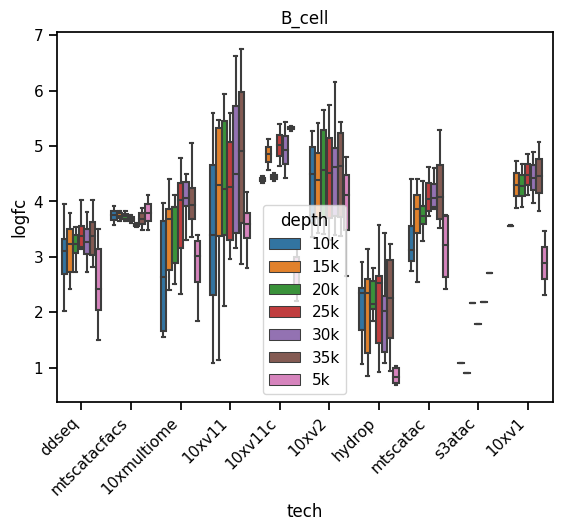

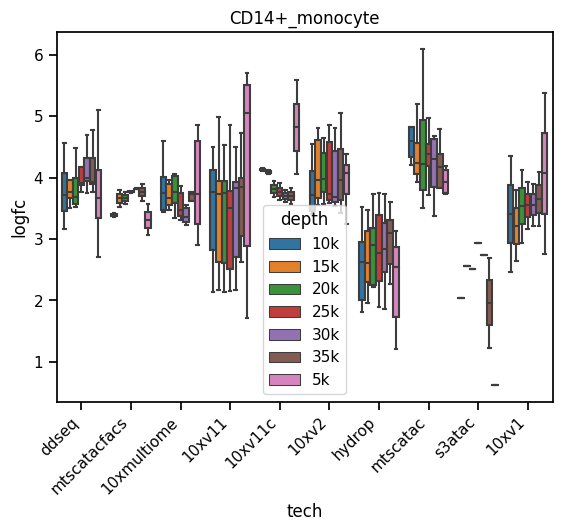

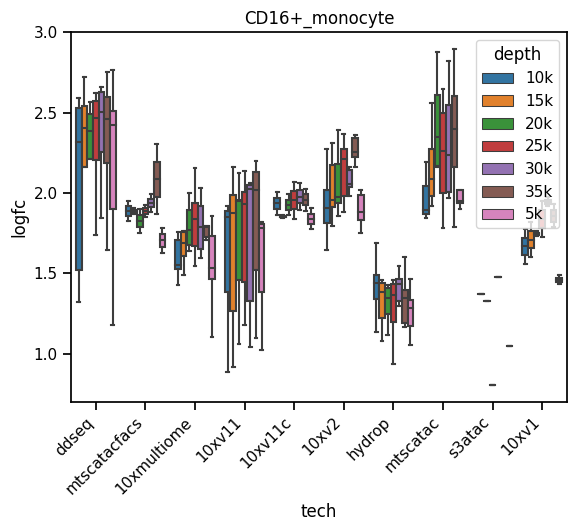

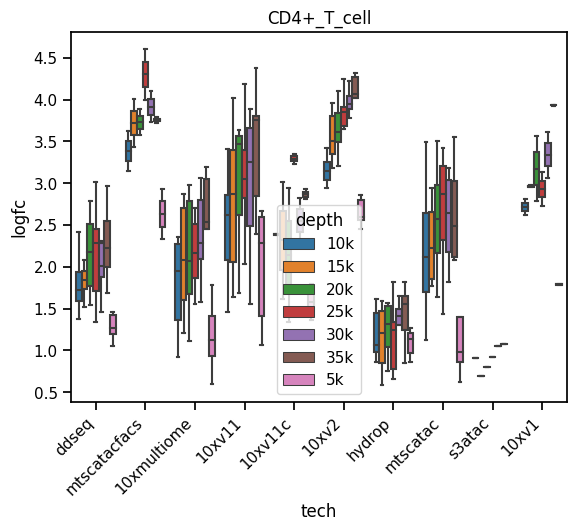

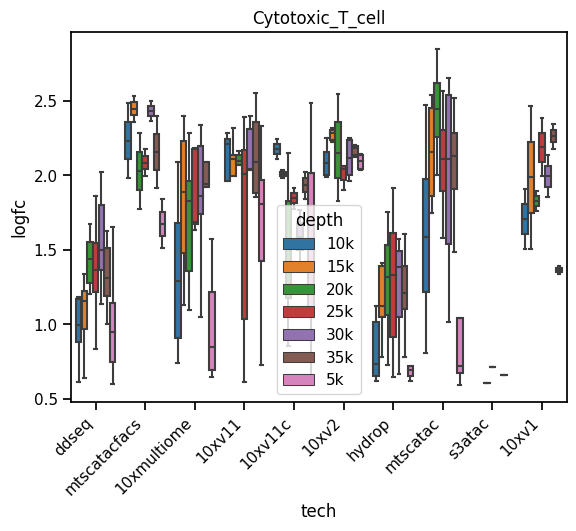

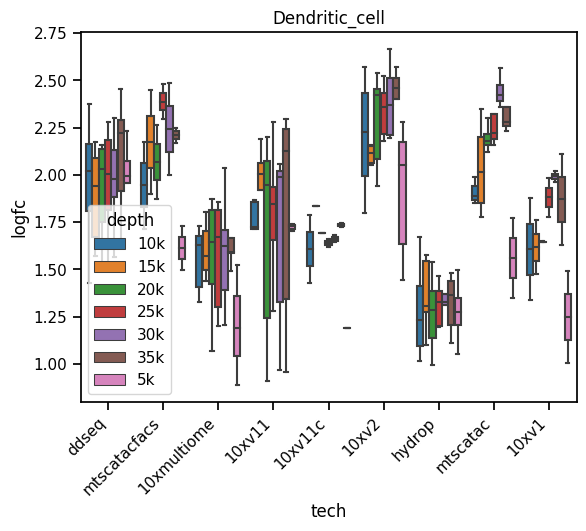

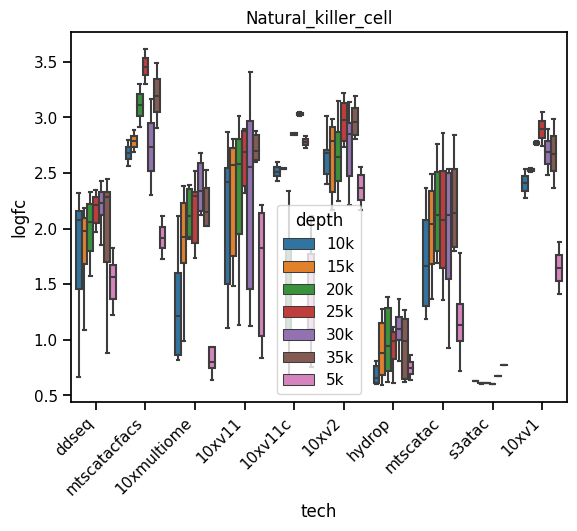

<IPython.core.display.Javascript object>

In [9]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    sns.boxplot(data=df_tmp, x="tech", y="logfc", hue="depth", showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title(cell_type)
    plt.show()
    plt.close()

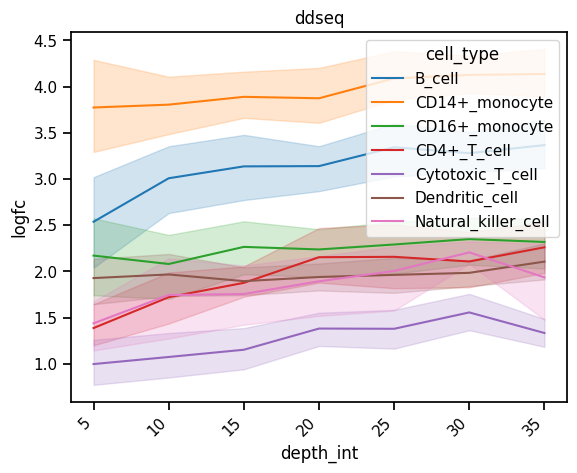

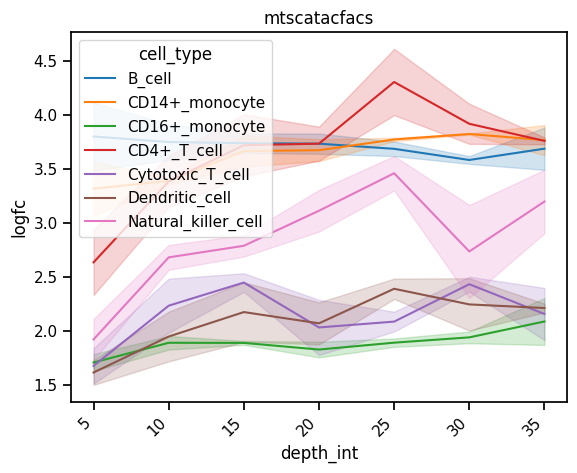

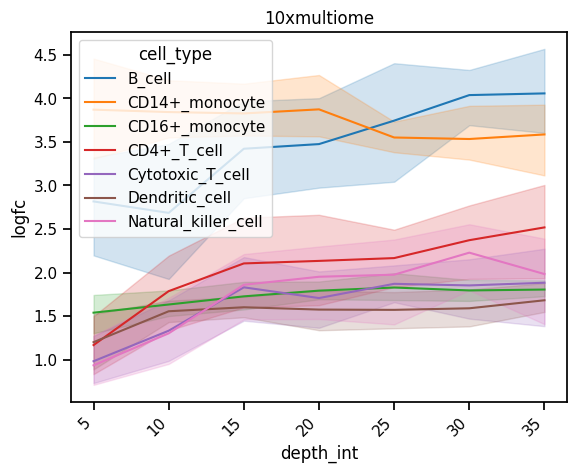

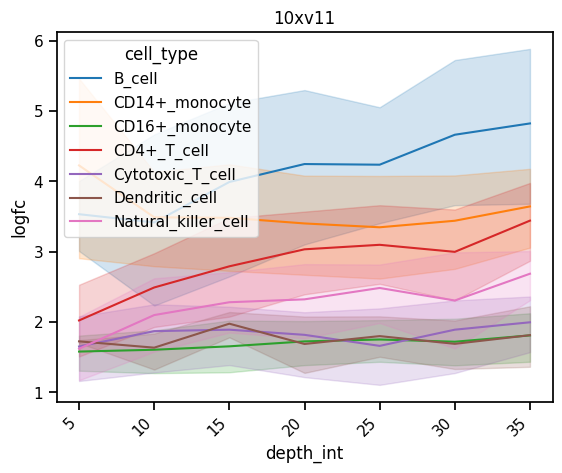

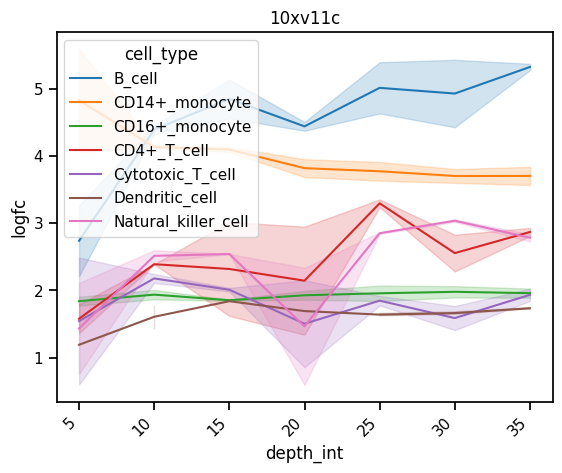

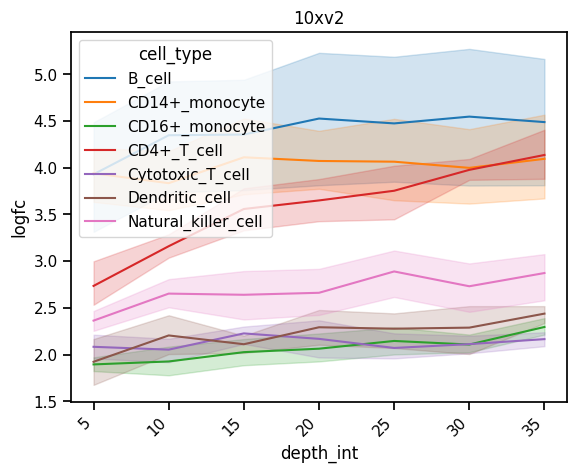

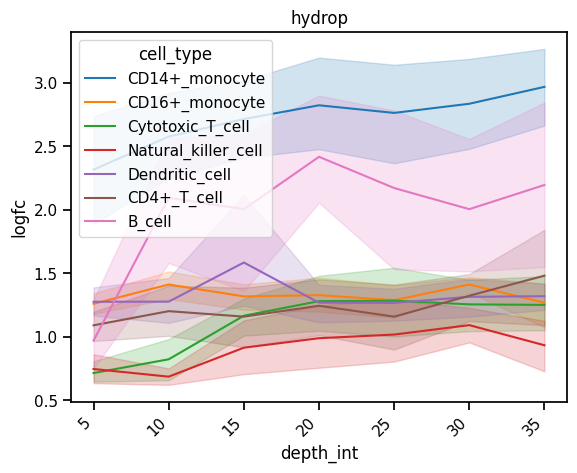

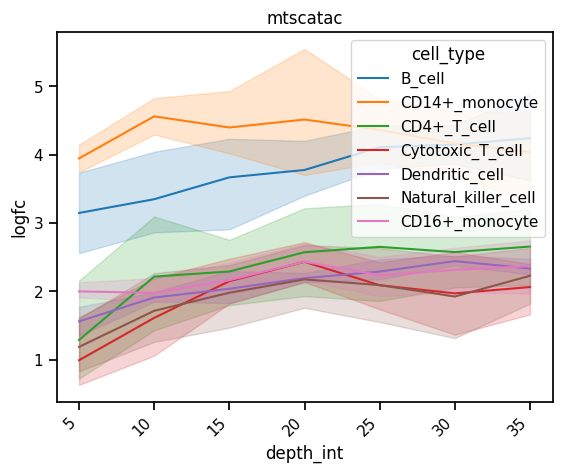

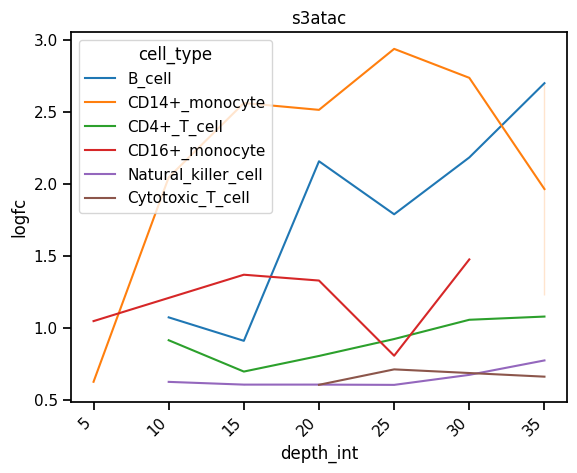

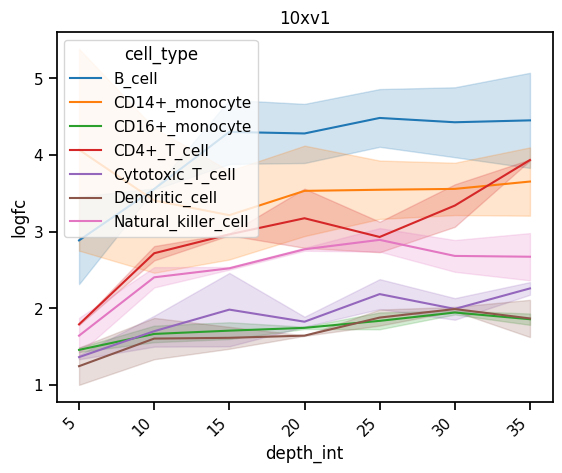

<IPython.core.display.Javascript object>

In [10]:
for tech in df_merged["tech"].unique():
    df_tmp = df_merged[df_merged["tech"] == tech]
    sns.lineplot(data=df_tmp, x="depth_int", y="logfc", hue="cell_type")
    plt.xticks(rotation=45, ha="right")
    plt.title(tech)
    plt.show()
    plt.close()

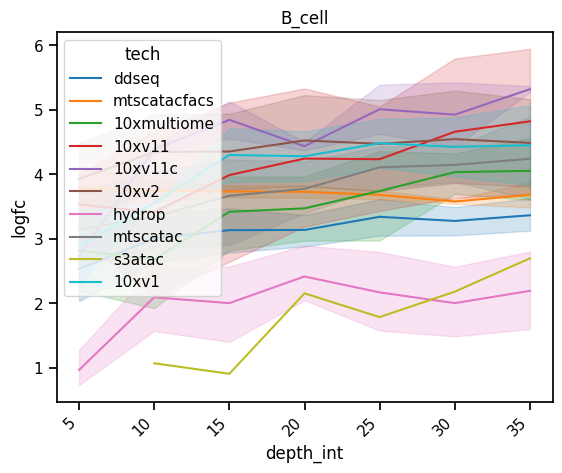

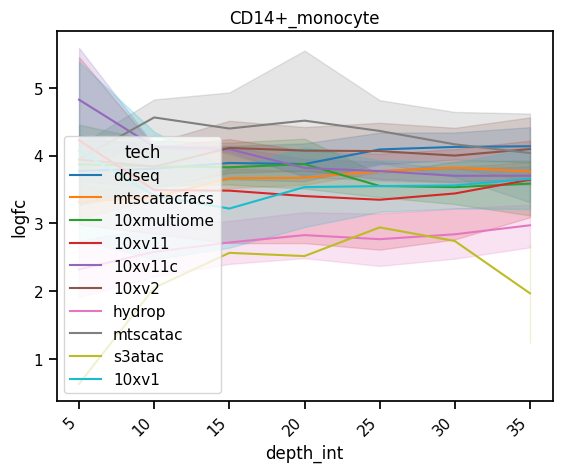

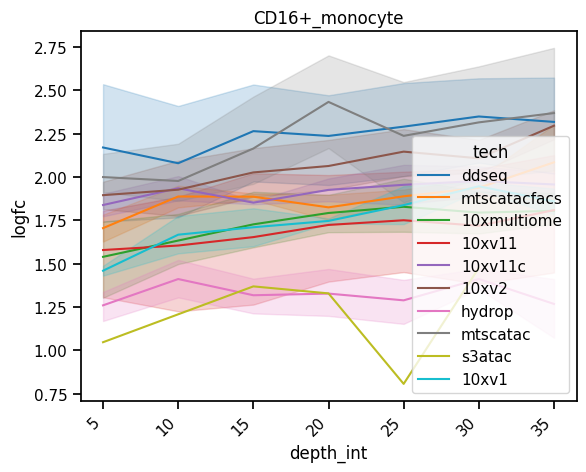

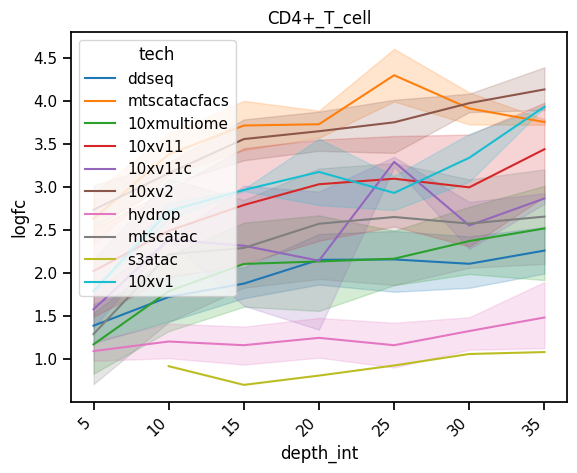

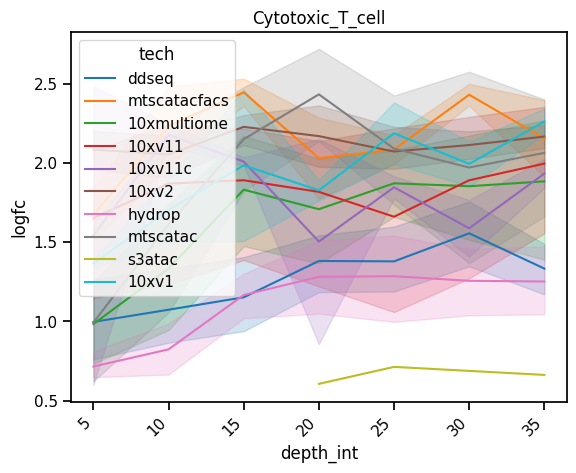

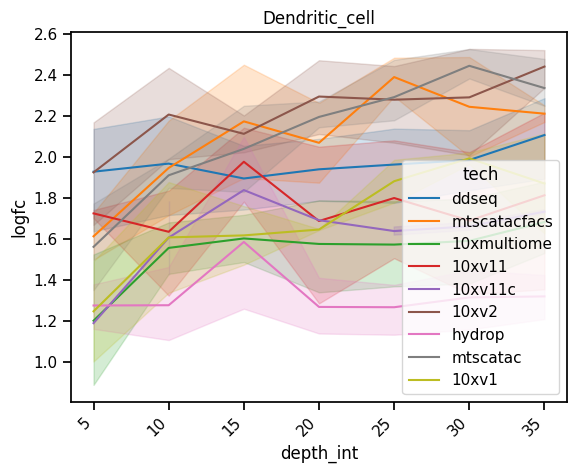

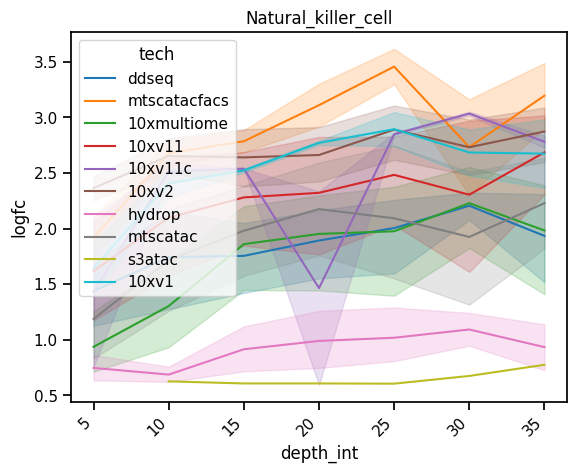

<IPython.core.display.Javascript object>

In [11]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]
    sns.lineplot(data=df_tmp, x="depth_int", y="logfc", hue="tech")
    plt.xticks(rotation=45, ha="right")
    plt.title(cell_type)
    plt.show()
    plt.close()

In [40]:
if not os.path.exists('downstream_analysis/all_dars_logfc.csv'):
    df_merged = pd.DataFrame()
    for sample, path in dar_path_dict.items():
        print(sample)
        supersample = sample.split("__")[0]
        cell_type = sample.split("__")[-1]

        df = pd.read_csv(path, header=None, sep="\t")
        df.columns = "chr start stop cell_type logfc strand p_val".split()
        df_merged.at[supersample, cell_type] = df["logfc"].median()

    df_merged = df_merged.stack()
    df_merged = df_merged.reset_index()
    df_merged.columns = "sample cell_type logfc".split()

    df_merged["sample"] = [
        x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
        .replace("CNA_10xv11_5", "CNA_10xv11c_2")
        .replace("BRO_mtscatac", "BRO_mtscatacfacs")
        for x in df_merged["sample"]
    ]
    df_merged["depth"] = [x.split(".")[-1] for x in df_merged["sample"]]
    df_merged["depth_int"] = [int(x.replace("k", "")) for x in df_merged["depth"]]

    df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

    df_merged.to_csv('downstream_analysis/all_dars_logfc.csv', header=True, index=True)
else:
    df_merged = pd.read_csv('downstream_analysis/all_dars_logfc.csv', header=0, index_col=0)

<IPython.core.display.Javascript object>

In [41]:
df_merged = df_merged[df_merged["depth_int"] <= 35]

<IPython.core.display.Javascript object>

In [42]:
df_merged_logfc = df_merged.copy()

<IPython.core.display.Javascript object>

In [43]:
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (Control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_color_palette = {'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x v1.1 (Control)': '#7570b3',
 '10x Multiome': '#e7298a',
 'mtscATAC-seq': '#66a61e',
 'mtscATAC-seq (FACS)': '#66a61e',
 'Bio-Rad ddSEQ SureCell': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v1.1 (Control)",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "mtscATAC-seq (FACS)",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

<IPython.core.display.Javascript object>

In [44]:
df_merged_means = df_merged.groupby(["tech", "depth", "cell_type"]).mean().reset_index()
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

<IPython.core.display.Javascript object>

In [45]:
df_merged_means_logfc = df_merged_means.copy()

<IPython.core.display.Javascript object>

In [46]:
{x: "" for x in tech_alias_order}

{'10x v1': '',
 '10x v1.1': '',
 '10x v1.1 (Control)': '',
 '10x v2': '',
 '10x Multiome': '',
 'mtscATAC-seq': '',
 'mtscATAC-seq (FACS)': '',
 'Bio-Rad ddSEQ SureCell': '',
 's3-ATAC': '',
 'HyDrop': ''}

<IPython.core.display.Javascript object>

In [47]:
dashes = {'10x v1': '',
 '10x v1.1': '',
 '10x v1.1 (Control)': (2, 1),
 '10x v2': '',
 '10x Multiome': '',
 'mtscATAC-seq': '',
 'mtscATAC-seq (FACS)': (2, 1),
 'Bio-Rad ddSEQ SureCell': '',
 's3-ATAC': '',
 'HyDrop': ''}

<IPython.core.display.Javascript object>

In [48]:
df_merged_means["fc"] = 2**df_merged_means["logfc"]

<IPython.core.display.Javascript object>

In [49]:
df_merged_means

,tech,depth,cell_type,logfc,depth_int,tech_alias,fc
s3atac.5k,s3atac,5k,CD16+_monocyte,1.047438,5.0,s3-ATAC,2.066857
10xv2.5k,10xv2,5k,CD16+_monocyte,1.895667,5.0,10x v2,3.720939
10xv2.5k,10xv2,5k,CD4+_T_cell,2.735651,5.0,10x v2,6.660594
10xv2.5k,10xv2,5k,Cytotoxic_T_cell,2.084092,5.0,10x v2,4.240081
10xv2.5k,10xv2,5k,Dendritic_cell,1.923936,5.0,10x v2,3.794568
...,...,...,...,...,...,...,...
10xmultiome.35k,10xmultiome,35k,B_cell,4.055649,35.0,10x Multiome,16.629222
10xmultiome.35k,10xmultiome,35k,CD14+_monocyte,3.584844,35.0,10x Multiome,11.999010
10xmultiome.35k,10xmultiome,35k,CD16+_monocyte,1.805304,35.0,10x Multiome,3.495029
10xmultiome.35k,10xmultiome,35k,Cytotoxic_T_cell,1.883527,35.0,10x Multiome,3.689759


<IPython.core.display.Javascript object>

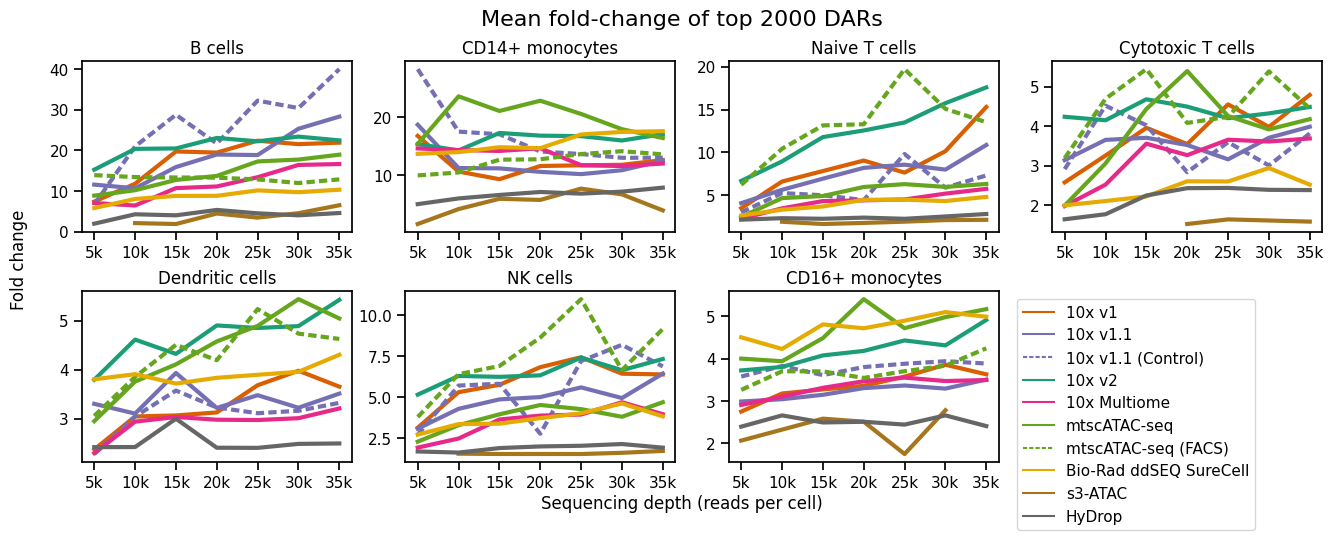

<IPython.core.display.Javascript object>

In [50]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows * 0.65), sharey=False
)
fontsize_large = 18
fig.subplots_adjust(hspace=0.35)

for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    
    sns.lineplot(
        data=df_tmp,
        x="depth",
        y="fc",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False
    )
    
    ax.set_ylabel(None)
    
    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)
            
        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )
        
        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()
        
fig.suptitle("Mean fold-change of top 2000 DARs", fontsize=16)
fig.text(0.5, 0.02, "Sequencing depth (reads per cell)", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Fold change",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig("plts/dar_strength_dependency.svg", dpi=600, facecolor="w")
plt.savefig("plts/dar_strength_dependency.png", dpi=600, facecolor="w")

plt.show()

In [ ]:
df_merged_means

,tech,depth,cell_type,logfc,depth_int,tech_alias,fc
s3atac.5k,s3atac,5k,CD16+_monocyte,1.047438,5.0,s3-ATAC,2.066857
10xv2.5k,10xv2,5k,CD16+_monocyte,1.895667,5.0,10x v2,3.720939
10xv2.5k,10xv2,5k,CD4+_T_cell,2.735651,5.0,10x v2,6.660594
10xv2.5k,10xv2,5k,Cytotoxic_T_cell,2.084092,5.0,10x v2,4.240081
10xv2.5k,10xv2,5k,Dendritic_cell,1.923936,5.0,10x v2,3.794568
...,...,...,...,...,...,...,...
10xmultiome.35k,10xmultiome,35k,B_cell,4.055649,35.0,10x Multiome,16.629222
10xmultiome.35k,10xmultiome,35k,CD14+_monocyte,3.584844,35.0,10x Multiome,11.999010
10xmultiome.35k,10xmultiome,35k,CD16+_monocyte,1.805304,35.0,10x Multiome,3.495029
10xmultiome.35k,10xmultiome,35k,Cytotoxic_T_cell,1.883527,35.0,10x Multiome,3.689759


<IPython.core.display.Javascript object>

In [52]:
df_merged_means[["tech", "depth_int", "cell_type", "logfc"]].to_csv(
    "derop_sourcedata_extendedfig8c.csv"
)

<IPython.core.display.Javascript object>

# number of DARs

In [23]:
dar_path_dict = {
    x.split("/")[-1].split("__DARs")[0]: x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*DARs.bed"))
}


dar_path_40k = {x.split('/')[-1].split('.')[0] + '.' + "40k" + "__"+  x.split('/')[-1].split('__')[1]: x for x in glob.glob('../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*DARs.bed')}

for key, val in dar_path_40k.items():
    dar_path_dict[key] = val

<IPython.core.display.Javascript object>

In [24]:
if not os.path.exists('downstream_analysis/all_n_dars.csv'):
    df_merged = pd.DataFrame()
    for sample, path in dar_path_dict.items():
        print(sample)
        supersample = sample.split("__")[0]
        cell_type = sample.split("__")[-1]

        df = pd.read_csv(path, header=None, sep="\t")
        df_merged.at[supersample, cell_type] = len(df)

    df_merged = df_merged.stack()
    df_merged = df_merged.reset_index()
    df_merged.columns = "sample cell_type n_dars".split()

    df_merged["sample"] = [
        x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
        .replace("CNA_10xv11_5", "CNA_10xv11c_2")
        .replace("BRO_mtscatac", "BRO_mtscatacfacs")
        for x in df_merged["sample"]
    ]
    df_merged["depth"] = [x.split(".")[-1] for x in df_merged["sample"]]
    df_merged["depth_int"] = [int(x.replace("k", "")) for x in df_merged["depth"]]

    df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]


    df_merged.to_csv('downstream_analysis/all_n_dars.csv', header=True, index=True)
else:
    df_merged = pd.read_csv('downstream_analysis/all_n_dars.csv', header=0, index_col=0)

<IPython.core.display.Javascript object>

In [25]:
df_merged.columns = ['sample', 'cell_type', 'n_dars', 'depth', 'depth_int', 'tech']

<IPython.core.display.Javascript object>

In [26]:
df_merged = df_merged[df_merged["depth_int"] <=35]

<IPython.core.display.Javascript object>

In [27]:
df_merged_means = df_merged.groupby(["tech", "depth", "cell_type"]).mean().reset_index()
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

<IPython.core.display.Javascript object>

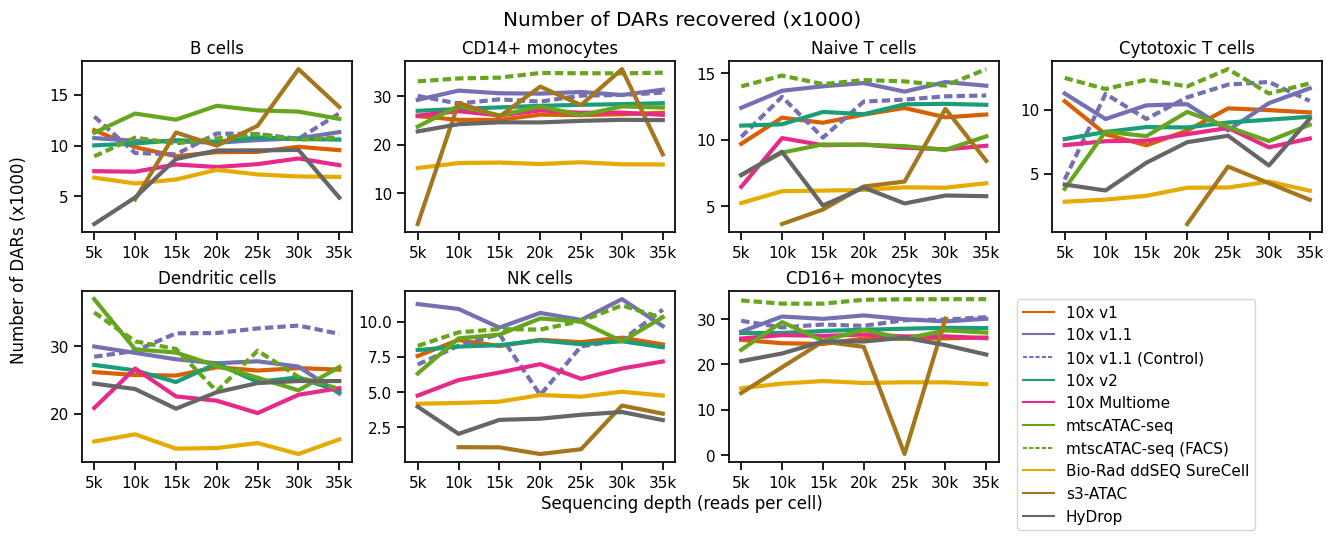

<IPython.core.display.Javascript object>

In [28]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows * 0.65), sharey=False
)
fontsize_large = 18
fig.subplots_adjust(hspace=0.35)

for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]
    df_tmp["n_dars"] = df_tmp["n_dars"]/1000
    
    sns.lineplot(
        data=df_tmp,
        x="depth",
        y="n_dars",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False
    )
    
    ax.set_ylabel(None)
    
    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)
            
        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )
        
        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle('Number of DARs recovered (x1000)')
fig.text(0.5, 0.02, "Sequencing depth (reads per cell)", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Number of DARs (x1000)",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig("plts/n_dars_dependency.svg", dpi=600, facecolor="w")
plt.savefig("plts/n_dars_dependency.png", dpi=600, facecolor="w")

plt.show()

In [35]:
df_merged_means[["tech", "depth_int", "cell_type", "n_dars"]].to_csv(
    "derop_sourcedata_extendedfig8b.csv"
)

<IPython.core.display.Javascript object>

In [31]:
df_sub = df_merged[df_merged["depth_int"] == 10]
df_sub = df_merged[df_merged["cell_type"] == "B_cell"]

<IPython.core.display.Javascript object>

In [32]:
df_merged["fc"] = 2**df_merged["logfc"]

<IPython.core.display.Javascript object>

In [33]:
df_sub =df_merged

<IPython.core.display.Javascript object>

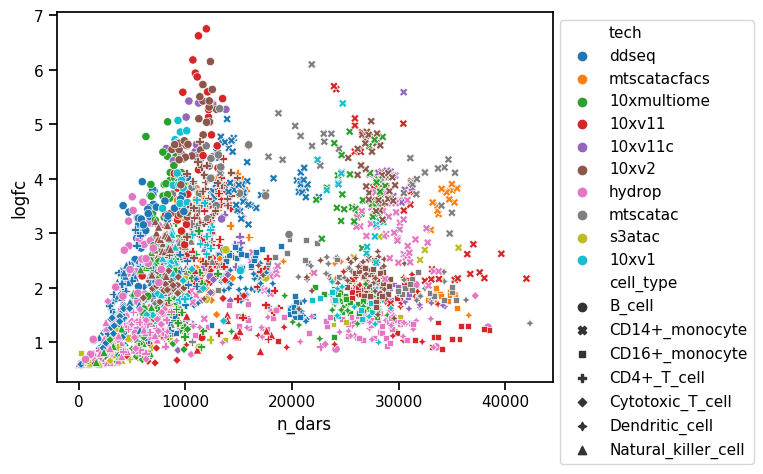

<IPython.core.display.Javascript object>

In [34]:
sns.scatterplot(data=df_sub, x="n_dars", y="logfc", hue="tech", style="cell_type")
plt.legend(loc="upper left",bbox_to_anchor=(1, 1))
